<div style="text-align: center;"><div  style="color:#03bafc; font-size:30px; font-weight:bold; line-height:40px;">Twitter Sentiment Analysis</div></div>
<div style="text-align: center; color:#006666"><strong>Created By: </strong>Parikshit Koya</div>
<br>
<div style="text-align: center; color:#006666"><strong>GitHub: </strong><a href='https://github.com/parikshitkoya'>https://github.com/parikshitkoya</a></div>
<div style="text-align: center; color:#006666"><strong>Kaggle: </strong><a href='https://www.kaggle.com/parikshitkoya'>https://www.kaggle.com/parikshitkoya</a></div>


In [1]:
import tweepy
from tweepy import Cursor
import pandas as pd
import json
import openpyxl
from datetime import datetime, timedelta
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import nltk
import sklearn as sk
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
amazon = pd.read_excel('amazon_tweets.xlsx', engine= 'openpyxl') 
flipkart = pd.read_excel('flipkart_tweets.xlsx', engine= 'openpyxl') 
snapdeal = pd.read_excel('snapdeal_tweets.xlsx', engine= 'openpyxl') 

In [3]:
amazon['brand'] = 'Amazon'
flipkart['brand'] = 'Flipkart'
snapdeal['brand'] = 'Snapdeal'

In [4]:
frames = [amazon,flipkart,snapdeal]
tweets = pd.concat(frames)
tweets2 = pd.concat(frames)

In [5]:
tweets.brand.value_counts()

Snapdeal    4094
Amazon      4000
Flipkart    3309
Name: brand, dtype: int64

In [6]:
tweets.head()

,Unnamed: 0,tweet_id,text,user,created,user_verified,full_text,brand
0,0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon


In [7]:
tweets = tweets.drop(tweets.columns[0], axis=1)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon
...,...,...,...,...,...,...,...
4089,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal
4090,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal
4091,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal
4092,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal


In [8]:
tweets.reset_index(drop=True, inplace=True)
tweets.head(5)

,tweet_id,text,user,created,user_verified,full_text,brand
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon


In [9]:
tweets[tweets['user_verified'] == True].head(10)

,tweet_id,text,user,created,user_verified,full_text,brand
519,1351112228410421249,Subramanium: CCI has not taken note of the fac...,barandbench,Mon Jan 18 10:20:32 +0000 2021,True,Subramanium: CCI has not taken note of the fac...,Amazon
577,1351109829323087980,.\n@JeffBezos\nHighly offending and provocativ...,VishvasSarang,Mon Jan 18 10:11:00 +0000 2021,True,.\n@JeffBezos\nHighly offending and provocativ...,Amazon
635,1351107061191348224,From One Plus to Redmi to Apple; Amazon offers...,JagranEnglish,Mon Jan 18 10:00:00 +0000 2021,True,From One Plus to Redmi to Apple; Amazon offers...,Amazon
670,1351105322476310529,".@Flipkart, @amazonIN announce Republic Day sa...",News18Tech,Mon Jan 18 09:53:05 +0000 2021,True,".@Flipkart, @amazonIN announce Republic Day sa...",Amazon
721,1351102789464846346,The Bench is now looking into the IAs. \nBench...,barandbench,Mon Jan 18 09:43:01 +0000 2021,True,The Bench is now looking into the IAs. \nBench...,Amazon
747,1351101535397289985,Justice PS Dinesh Kumar begins hearing the mat...,barandbench,Mon Jan 18 09:38:02 +0000 2021,True,Justice PS Dinesh Kumar begins hearing the mat...,Amazon
847,1351097728940601344,. @amazonIN : if you want to do business in In...,SharmaKhemchand,Mon Jan 18 09:22:55 +0000 2021,True,. @amazonIN : if you want to do business in In...,Amazon
858,1351096876951601154,The Karnataka HC will shortly hear two pleas m...,barandbench,Mon Jan 18 09:19:32 +0000 2021,True,The Karnataka HC will shortly hear two pleas m...,Amazon
1236,1351084623997116417,Amazon Gift Vouchers are waiting for you. All ...,amazonIN,Mon Jan 18 08:30:50 +0000 2021,True,Amazon Gift Vouchers are waiting for you. All ...,Amazon
1270,1351081589430759424,.@BJP4India IT cell chief @amitmalviya wrote t...,payalmehta100,Mon Jan 18 08:18:47 +0000 2021,True,.@BJP4India IT cell chief @amitmalviya wrote t...,Amazon


In [10]:
tweets[tweets['user_verified'] == True].tail(10)

,tweet_id,text,user,created,user_verified,full_text,brand
10840,1327147319528202242,.@snapdeal has scripted a successful turnaroun...,forbes_india,Fri Nov 13 07:12:32 +0000 2020,True,.@snapdeal has scripted a successful turnaroun...,Snapdeal
10842,1327144166699139072,.@snapdeal has bounced back from the verge of ...,forbes_india,Fri Nov 13 07:00:01 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10872,1326864823892672512,.@snapdeal has bounced back from the verge of ...,forbes_india,Thu Nov 12 12:30:00 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10878,1326826554878464000,.@snapdeal has bounced back from the verge of ...,forbes_india,Thu Nov 12 09:57:56 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10899,1326528504637267974,"RT @NASSCOM_Product: Kunal Bahl, Co-Founder an...",1kunalbahl,Wed Nov 11 14:13:35 +0000 2020,True,"RT @NASSCOM_Product: Kunal Bahl, Co-Founder an...",Snapdeal
10912,1326473611557838848,"RT @nasscom: ""I believe that the software prod...",1kunalbahl,Wed Nov 11 10:35:28 +0000 2020,True,"RT @nasscom: ""I believe that the software prod...",Snapdeal
10913,1326472851881226240,"RT @nasscom: ""I believe that the software prod...",debjani_ghosh_,Wed Nov 11 10:32:27 +0000 2020,True,"RT @nasscom: ""I believe that the software prod...",Snapdeal
10915,1326470702610837509,"""I believe that the software product startups ...",nasscom,Wed Nov 11 10:23:54 +0000 2020,True,"""I believe that the software product startups ...",Snapdeal
11074,1324603101555257345,@Ritzie___ @snapdeal @Snapdeal_Help @BankofBar...,bankofbaroda,Fri Nov 06 06:42:44 +0000 2020,True,@Ritzie___ @snapdeal @Snapdeal_Help @BankofBar...,Snapdeal
11196,1323551463428280325,".@snapdeal founders, others #invest in #social...",vccircle,Tue Nov 03 09:03:53 +0000 2020,True,".@snapdeal founders, others #invest in #social...",Snapdeal


Tweets from verified accounts are usually either sponsered or Retweets. These are not true consumer sentiments and we can remove these tweets.

In [11]:
print(len(tweets))
tweets.drop(tweets[tweets['user_verified'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

11403
11248


In [12]:
tweets.tail(10)

,tweet_id,text,user,created,user_verified,full_text,brand
11238,1322359581595455488,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Sat Oct 31 02:07:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal
11239,1322258071981191168,"RT @bankofbaroda: This festive season, shop on...",imshovit,Fri Oct 30 19:24:25 +0000 2020,False,"RT @bankofbaroda: This festive season, shop on...",Snapdeal
11240,1322245972127178752,@snapdeal\n@1kunalbahl \n@rohitkbansal \n Sir ...,Hemansee1,Fri Oct 30 18:36:20 +0000 2020,False,@snapdeal\n@1kunalbahl \n@rohitkbansal \n Sir ...,Snapdeal
11241,1322244610597384193,@snapdeal \n Sir we r duped ...Fraudster did s...,Hemansee1,Fri Oct 30 18:30:55 +0000 2020,False,@snapdeal \n Sir we r duped ...Fraudster did s...,Snapdeal
11242,1322230246599393283,@UniverseUNLTD @Lucille_Is_Mine @Dilljaley @Me...,devgandhi1988,Fri Oct 30 17:33:51 +0000 2020,False,@UniverseUNLTD @Lucille_Is_Mine @Dilljaley @Me...,Snapdeal
11243,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal
11244,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal
11245,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal
11246,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal
11247,1322211624044818432,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:19:51 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal


While we have already filtered out the retweets for Amazon and Flipkart while extacting the Tweets from Tweepy, the method used for extracting tweets for snapdeal was slightly different.

We are expecting a lot of retweets in the tweets extracted for Snapdeal. We will delete there retweets.

In [13]:
tweets['is_retweet'] = tweets['full_text'].str.startswith('RT ')
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False
...,...,...,...,...,...,...,...,...
11243,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False
11244,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False
11245,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False
11246,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False


In [14]:
tweets[tweets['is_retweet'] == True]['brand'].value_counts()

Snapdeal    924
Name: brand, dtype: int64

### Removing retweets
As we can see that out of approx 4000 (after removing tweets from verified users) tweets we have for Snapdeal, 924 of these are [retweets](https://help.twitter.com/en/using-twitter/retweet-faqs#:~:text=A%20Retweet%20is%20a%20re,re%2Dposting%20someone%20else's%20content.).
<br>
We will drop these retweets as well.

In [15]:
print(len(tweets))
tweets.drop(tweets[tweets['is_retweet'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

11248
10324


In [16]:
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False
...,...,...,...,...,...,...,...,...
10319,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False
10320,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False
10321,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False
10322,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False


In [17]:
hashtags = []
for i in range(len(tweets)):
    if '#' in tweets['full_text'].iloc[i]:
        hashtags.append(re.findall(r"#(\w+)", tweets['full_text'].iloc[i]))
    else:
        hashtags.append(np.nan)

In [18]:
tweets['hashtags'] = hashtags

In [19]:
mentions = []
for i in range(len(tweets)):
    if '@' in tweets['full_text'].iloc[i]:
        mentions.append(re.findall(r"@(\w+)", tweets['full_text'].iloc[i]))
    else:
        mentions.append(np.nan)
tweets['mentions'] = mentions

In [20]:
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]"
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN]
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh..."
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]"
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN]


Creating Function to clean up text

In [22]:
def cleantext(text):

    text = text.replace('\n', ' ') #Remove linebreaks
    text = re.sub(r'@([A-Za-z0-9_]+)', '', text) #Remove @Handles
    text = re.sub(r'#([A-Za-z0-9_]+)', '', text) #Remove the #Hastags
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove URLs
    text = re.sub(r'(?<=[a-z])\r?\n','', text) #Remove linebreaks
    text = re.sub(r'[0-9]+', '', text) #Remove numberic characters    
    text = ''.join(word.strip(string.punctuation) for word in text) #Remove punctuation
    text = text.lower()
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f" 
                               u"\u3030"
                               "]+", flags=re.UNICODE) 
    return emoji_pattern.sub(r'', text) #Remove Emojis
    text = re.sub('\s+', ' ', text) #Remove more than duplicate Whitespaces
    text = text.strip() #Remove leading and trailing Whitespaces
    text = ' '.join(text.split())
    return text

In [23]:
tweets['clean_text'] = tweets['full_text'].apply(cleantext)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]",whats wrong after pickups being scheduled s...
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN],a b c d
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh...",a redmi a rs b samsung galaxy m rs c re...
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",a redmi a rs b samsung galaxy m rs c re...
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN],aura by samyak naturals is now amazons choice ...


As we can see that there cases where after cleanup, full_text column is now blank. This is not a nan value but a string with no characters in it.
<br>
<br>
We will start by dropping some columns which are not required.

Since the cells in full_text with no values are still being considered a string as opposed to nan. We will have to create an identifier for these.

In [25]:
blank_text_check = []
for i in range(len(tweets)):
    blank_text_check.append(" ".join(tweets['clean_text'].iloc[i].split()))
tweets['blank_text_check'] = blank_text_check

In [26]:
is_blank = (tweets['blank_text_check'] =='')
tweets['is_blank'] = is_blank

In [27]:
tweets[tweets['is_blank'] == True]

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,blank_text_check,is_blank
4756,1350792998754287617,@motorolaindia @Flipkart `\n 🄷 🄴 🄻 🄻...,Ni3iN_D28,Sun Jan 17 13:12:02 +0000 2021,False,@motorolaindia @Flipkart `\n 🄷 🄴 🄻 🄻...,Flipkart,False,"[𝗿𝗮𝘇𝗿𝟱𝗚, 𝐌𝐢𝐧𝐢𝐦𝐚𝐥𝐌𝐞𝐞𝐭𝐬𝐌𝐚𝐱𝐢𝐦𝐮𝐦]","[motorolaindia, Flipkart]",...,,True
7248,1350953560008175619,@snapdeal 91287989,Rakeshk92153278,Sun Jan 17 23:50:02 +0000 2021,False,@snapdeal 91287989,Snapdeal,False,NaN,[snapdeal],,,True
7250,1350771347039817730,@snapdeal ..,KmlKing3,Sun Jan 17 11:45:59 +0000 2021,False,@snapdeal ..,Snapdeal,False,NaN,[snapdeal],,,True
7297,1350424386675765249,@Rupa_Books @HundrEDorg @FabindiaNews @Fabindi...,MyGoodSchool,Sat Jan 16 12:47:18 +0000 2021,False,@Rupa_Books @HundrEDorg @FabindiaNews @Fabindi...,Snapdeal,False,"[NewProfilePic, book]","[Rupa_Books, HundrEDorg, FabindiaNews, Fabindi...",,,True
7311,1350327276777324546,@9415Swami @amazonIN @AmazonHelp @amazon @Amaz...,Hardikdangadhvi,Sat Jan 16 06:21:25 +0000 2021,False,@9415Swami @amazonIN @AmazonHelp @amazon @Amaz...,Snapdeal,False,NaN,"[9415Swami, amazonIN, AmazonHelp, amazon, Amaz...",,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,1322829906850578432,@7ru7h_1 @amazonIN @Flipkart @myntra @snapdeal...,ranubhogi,Sun Nov 01 09:16:41 +0000 2020,False,@7ru7h_1 @amazonIN @Flipkart @myntra @snapdeal...,Snapdeal,False,NaN,"[7ru7h_1, amazonIN, Flipkart, myntra, snapdeal...",,,True
10288,1322602009317371904,@snapdeal @rblbank @PMOIndia @FinMinIndia http...,bh_devilal,Sat Oct 31 18:11:06 +0000 2020,False,@snapdeal @rblbank @PMOIndia @FinMinIndia http...,Snapdeal,False,NaN,"[snapdeal, rblbank, PMOIndia, FinMinIndia]",,,True
10295,1322522673654607875,@flipkartsupport @_Kalyan_K @amazon @snapdeal ...,RakeshR35024223,Sat Oct 31 12:55:51 +0000 2020,False,@flipkartsupport @_Kalyan_K @amazon @snapdeal ...,Snapdeal,False,NaN,"[flipkartsupport, _Kalyan_K, amazon, snapdeal,...",,,True
10297,1322508626641051653,@jagograhakjago @snapdeal @Flipkart @TimesNow ...,smartsonzy,Sat Oct 31 12:00:02 +0000 2020,False,@jagograhakjago @snapdeal @Flipkart @TimesNow ...,Snapdeal,False,NaN,"[jagograhakjago, snapdeal, Flipkart, TimesNow,...",,,True


In [28]:
tweets[tweets['is_blank'] == True]['brand'].value_counts()

Snapdeal    115
Flipkart      1
Name: brand, dtype: int64

In [29]:
print(len(tweets))
tweets.drop(tweets[tweets['is_blank'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

10324
10208


In [30]:
tweets = tweets.drop(tweets[['is_blank','blank_text_check']], axis=1)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]",whats wrong after pickups being scheduled s...
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN],a b c d
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh...",a redmi a rs b samsung galaxy m rs c re...
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",a redmi a rs b samsung galaxy m rs c re...
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN],aura by samyak naturals is now amazons choice ...
...,...,...,...,...,...,...,...,...,...,...,...
10203,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False,NaN,"[Flipkart, amazonIN, snapdeal]",big billion stories hey why you should disp...
10204,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False,NaN,"[UniverseUNLTD, devgandhi1988, Dilljaley, Megh...",both are cs
10205,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False,NaN,"[Lucille_Is_Mine, Dilljaley, MeghUpdates, amaz...",yes you should first look at yourself
10206,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False,NaN,"[devgandhi1988, Dilljaley, MeghUpdates, amazon...",thats the problem pragmatism is missing...


In [31]:
# sorting by user, full_text, created
tweets.sort_values(['user', 'full_text', 'created'], inplace = True)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
3852,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january
9998,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if...
9996,1325008842170626049,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:35:00 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...
9997,1325008793739042816,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:34:48 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...
10000,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order from no order is being late as its t...
...,...,...,...,...,...,...,...,...,...,...,...
8905,1340196947810893824,@ShikhaaDhariwal @Rajput_Ramesh @snapdeal Scam?,zen4freedom,Sat Dec 19 07:27:06 +0000 2020,False,@ShikhaaDhariwal @Rajput_Ramesh @snapdeal Scam?,Snapdeal,False,NaN,"[ShikhaaDhariwal, Rajput_Ramesh, snapdeal]",scam
10094,1323524218877698048,#buylocal #vocalforlocal\nBe Stylish...Be You....,zidoclothing,Tue Nov 03 07:15:38 +0000 2020,False,#buylocal #vocalforlocal\nBe Stylish...Be You....,Snapdeal,False,"[buylocal, vocalforlocal, fashion, tshirt, Sal...","[amazon, flipkart, myntra, limeroad, 2gud, pay...",be stylishbe you byu now zido tshirts for me...
9205,1336192239261736962,#vocalforlocal #buylocal\nBe Stylish... Be You...,zidoclothing,Tue Dec 08 06:13:49 +0000 2020,False,#vocalforlocal #buylocal\nBe Stylish... Be You...,Snapdeal,False,"[vocalforlocal, buylocal, fashion, tshirt, buy...","[amazon, flipkart, myntra, limeroad, paytm, sn...",be stylish be you must have tee for trade en...
2049,1350906351380168704,#AmazonQuiz\n#Pictionary|FunzoneCarnival \n@am...,zubeer_ahmed17,Sun Jan 17 20:42:27 +0000 2021,False,#AmazonQuiz\n#Pictionary|FunzoneCarnival \n@am...,Amazon,False,"[AmazonQuiz, Pictionary]","[amazon, amazonIN, AmazonHelp]",funzonecarnival


In [32]:
g = tweets.groupby(['user'])['tweet_id'].count()
userlist = pd.DataFrame(g).sort_values(['tweet_id'], ascending=False)
userlist

,tweet_id
user,
eu3or,605
rajusharma083,212
guddu458,208
APSHindu1,121
Ban00174860Neha,93
...,...
SJAYPATHAK,1
SKervin4,1
SRKsRK07,1


In [33]:
g = tweets.groupby(['brand','user'])['tweet_id'].count()
userlist = pd.DataFrame(g).sort_values(['user'], ascending=False).sort_values(['tweet_id'], ascending=False)
userlist[userlist['tweet_id']>1]

tweet_id
brand    user                     
Snapdeal eu3or                 605
         rajusharma083         212
         guddu458              207
         APSHindu1             121
Flipkart Ban00174860Neha        93
...                            ...
Amazon   nidhi_rn                2
         nikhilpai               2
         Dr_Sphagetti            2
Snapdeal Drashwini28             2
Amazon   Abhiram98253712         2

[1377 rows x 1 columns]

In [39]:
stops = nltk.corpus.stopwords.words('english')

In [40]:
lem = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

Lets try to create a Function to Stem and Lemmatize Text

In [42]:
def stemmer(text):
    text = " ".join([ps.stem(word) for word in text.split() if word not in stops])

    
def lemmatizer(text):
    text = " ".join([lem.lemmatize(tokens) for tokens in text.split() if tokens not in stops])

In [43]:
for word in tweets['clean_text'][0].split():
    print(word)

⃣⃣th
january


In [44]:
" ".join([ps.stem(word) for word in tweets['clean_text'][6].split() if word not in stops])

'order product day abl deliverd product u even cancel order without opinion'

In [45]:
" ".join([lem.lemmatize(word) for word in tweets['clean_text'][6].split() if word not in stops])

'order product day able deliverd product u even cancelled order without opinion'

In [46]:
tweets['clean_text'][6]

'i order from     a product after  day they not able to deliverd my product are u same           they even cancelled my order without my opinion  '

In [47]:
tweets['stemmed_text'] = tweets['clean_text'].apply(stemmer)
tweets['lemmatized_text'] = tweets['clean_text'].apply(lemmatizer)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,None,None
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if...,None,None
2,1325008842170626049,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:35:00 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...,None,None
3,1325008793739042816,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:34:48 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...,None,None
4,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order from no order is being late as its t...,None,None


Function did not work for some reason. Due to time crunch, proceeding with iterative for loop.

In [49]:
stemmed_text = []
for i in range(len(tweets)):
    text = []
    for word in tweets.iloc[i]['clean_text'].split():
        text.append(ps.stem(word))
    stemmed_text.append(" ".join(text))
stemmed_text

['⃣⃣th januari',
 'order is be late it day sinc order if thi is srvice u are prvide tn is btter then u evn my local mrket provid better servic u cal it festivl ofer but order deliv aftr festiv',
 'order is be late it day sinc order if thi is srvice u are prvide tn is btter then u evn my local mrket provid better servic u cal it festivl ofer but order deliv aftr festiv',
 'order is be late it day sinc order if thi is srvice u are prvide tn is btter then u evn my local mrket provid better servic u cal it festivl ofer but order deliv aftr festiv',
 'order from no order is be late as it th day sinc order if thi is servic u are provid then is better then u even my local market provid better servic',
 'order from no order is be late as it th day sinc order if thi is srvice u are prvide ten is btter then u evn my local mrket provid better servic u cal it festivl ofer but order deliv aftr festiv',
 'i order from a product after day they not abl to deliverd my product are u same they even cance

In [50]:
lemmatized_text = []
for i in range(len(tweets)):
    text = []
    for word in tweets.iloc[i]['clean_text'].split():
        text.append(lem.lemmatize(word))
    lemmatized_text.append(" ".join(text))
lemmatized_text

['⃣⃣th january',
 'order is being late it day since order if this is srvice u are prviding tn is btter then u evn my local mrket provides better service u cal it festivl ofer but order delivering aftr festival',
 'order is being late it day since order if this is srvice u are prviding tn is btter then u evn my local mrket provides better service u cal it festivl ofer but order delivering aftr festival',
 'order is being late it day since order if this is srvice u are prviding tn is btter then u evn my local mrket provides better service u cal it festivl ofer but order delivering aftr festival',
 'order from no order is being late a it th day since order if this is service u are providing then is better then u even my local market provides better service',
 'order from no order is being late a it th day since order if this is srvice u are prviding ten is btter then u evn my local mrket provides better service u cal it festivl ofer but order delivering aftr festival',
 'i order from a pr

In [51]:
tweets['stemmed_text'] = stemmed_text
tweets['lemmatized_text'] = lemmatized_text
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if...,order is be late it day sinc order if thi is s...,order is being late it day since order if this...
2,1325008842170626049,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:35:00 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...,order is be late it day sinc order if thi is s...,order is being late it day since order if this...
3,1325008793739042816,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:34:48 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if t...,order is be late it day sinc order if thi is s...,order is being late it day since order if this...
4,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order from no order is being late as its t...,order from no order is be late as it th day si...,order from no order is being late a it th day ...


As we can see there are a lot of users who have mentioned our target handles multiple times.
<br>
While tweeting to the same handle is acceptable, tweeting to the same handle 10s or 100s of times can be considered spam.
<br>
Let's look at a few examples to analyse how we can handle these cases.

In [52]:
tweets[tweets['user'] == 'eu3or']['lemmatized_text']

5580    don’t buy anything from worst delivery worst c...
5581    don’t buy anything from worst delivery worst c...
5582    don’t buy anything from worst delivery worst c...
5583    sent damaged product amp couldn’t pick it requ...
5584    sent damaged product amp couldn’t pick it requ...
                              ...                        
5844    whole team have been trained to promote fraud ...
5845    whole team have been trained to promote fraud ...
5846    whole team have been trained to promote fraud ...
5847    whole team have been trained to promote fraud ...
5848    will i get reimbursement for doing delivery jo...
Name: lemmatized_text, Length: 269, dtype: object

In [53]:
tweets[tweets['user'] == 'guddu458']['lemmatized_text']

5951    i had received empty box what is this please h...
5952    i had received empty box what is this please h...
5953    i had received empty box what is this please h...
5954    i had received empty box what is this please h...
5955    i had received empty box what is this please h...
5956    i had received empty box what is this please h...
5957                                 you company is fraud
5958    i had received empty box what is this please h...
5959    i had received empty box what is this please h...
5960    i had received empty box what is this please h...
5961    i had received empty box what is this please h...
5962    i had received empty box what is this please h...
5963    i had received empty box what is this please h...
5964    i had received empty box what is this please h...
5965                                               plz rt
5966    i had received empty box what is this please h...
5967    i had received empty box what is this please h...
Name: lemmatiz

In [54]:
tweets[tweets['user'] == 'APSHindu1']['lemmatized_text']

96     yah snapdeal company terrorist ka factory hai ...
97     twitter user celebrity vip i apologize to all ...
98     yah snapdeal company terrorist ka factory hai ...
99     yah snapdeal company terrorist ka factory hai ...
100    yah snapdeal company terrorist ka factory hai ...
101    twitter user celebrity vip i apologize to all ...
102    kunal bahl is a thief a terrorist guruall this...
103    yah snapdeal company terrorist ka factory hai ...
104    kunal bahl is a thief a terrorist guruall this...
105    yah snapdeal company terrorist ka factory hai ...
106    yah snapdeal company terrorist ka factory hai ...
Name: lemmatized_text, dtype: object

In [55]:
tweets[tweets['user'] == 'Ban00174860Neha']['lemmatized_text']

715    od u are chori u are theif i got damaged watch...
716    od u are chori u are theif i got damaged watch...
717    od u are chori u are theif i got damaged watch...
718    od u are chori u are theif i got damaged watch...
719    od u are chori u are theif i got damaged watch...
720    od u are chori u are theif i got damaged watch...
721    od u are chori u are theif i got damaged watch...
722    od u are chori u are theif i got damaged watch...
723    od u are chori u are theif i got damaged watch...
724    od u are chori u are theif i got damaged watch...
725    od u are chori u are theif i got damaged watch...
726    od u are chori u are theif i got damaged watch...
727    od u are chori u are theif i got damaged watch...
728    od u are chori u are theif i got damaged watch...
729    od u are chori u are theif i got damaged watch...
730    od u are chori u are theif i got damaged watch...
731    od u are chori u are theif i got damaged watch...
732    od u are chori u are the

As we can see that there are users who have tweeted multiple times and the contents of the text is the same. What we can do is delete the duplicate text per user per brand as there are times when users have mentioned two and even three of out target brands.

In [56]:
print(len(tweets))
# dropping all duplicte values except the first
tweets.drop_duplicates(subset =["brand","user","lemmatized_text"], keep = 'first', inplace = True) 
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))
print(tweets.brand.value_counts())

8967
8557
Amazon      3651
Flipkart    3070
Snapdeal    1836
Name: brand, dtype: int64


In [57]:
from textblob import TextBlob

Getting Polirity of the stemmed & lemmatized text

In [58]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [59]:
tweets['polarity_stem'] = tweets['stemmed_text'].apply(getPolarity)
tweets['polarity_lem'] = tweets['lemmatized_text'].apply(getPolarity)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text,polarity_stem,polarity_lem
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january,0.000000,0.000000
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if...,order is be late it day sinc order if thi is s...,order is being late it day since order if this...,0.066667,0.066667
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order from no order is being late as its t...,order from no order is be late as it th day si...,order from no order is being late a it th day ...,0.175000,0.175000
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order from no order is being late as its th...,order from no order is be late as it th day si...,order from no order is being late a it th day ...,0.050000,0.050000
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",i order from a product after day they not...,i order from a product after day they not abl ...,i order from a product after day they not able...,0.000000,-0.125000


We tried both Stemming and Lemmatization and it seems both Lemmatized text retains polarity better.
We will now convert the poliarity into sentiment.
- Polarity > 0 : Positive
- Polarity = 0 : Neurtal
- Polarity < 0 : Negative

In [60]:
sentiment = np.where(tweets['polarity_lem']>0,'Positive',np.where(tweets['polarity_lem']<0,'Negative','Neutral'))
tweets['sentiment'] = sentiment
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text,polarity_stem,polarity_lem,sentiment
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january,0.000000,0.000000,Neutral
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order is being late its day since order if...,order is be late it day sinc order if thi is s...,order is being late it day since order if this...,0.066667,0.066667,Positive
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order from no order is being late as its t...,order from no order is be late as it th day si...,order from no order is being late a it th day ...,0.175000,0.175000,Positive
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order from no order is being late as its th...,order from no order is be late as it th day si...,order from no order is being late a it th day ...,0.050000,0.050000,Positive
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",i order from a product after day they not...,i order from a product after day they not abl ...,i order from a product after day they not able...,0.000000,-0.125000,Negative


In [61]:
import seaborn as sns

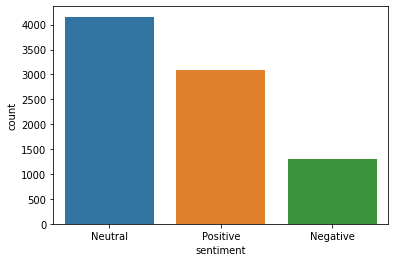

In [70]:
ax = sns.countplot(x = 'sentiment', data=tweets)

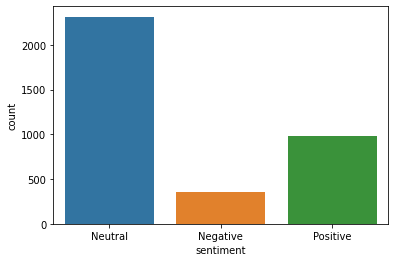

In [62]:
ax = sns.countplot(x = 'sentiment', data=tweets[tweets['brand']=='Amazon'])

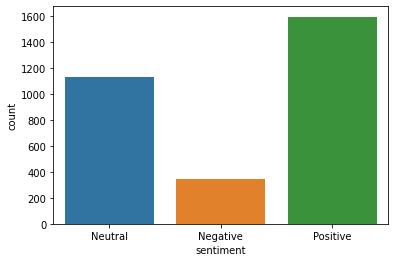

In [63]:
ax = sns.countplot(x = 'sentiment', data=tweets[tweets['brand']=='Flipkart'])

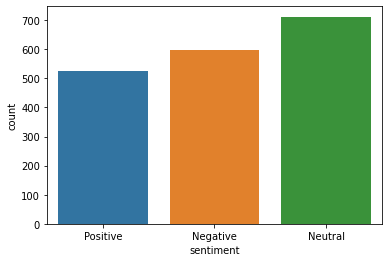

In [64]:
ax = sns.countplot(x = 'sentiment', data=tweets[tweets['brand']=='Snapdeal'])

In [65]:
from wordcloud import WordCloud

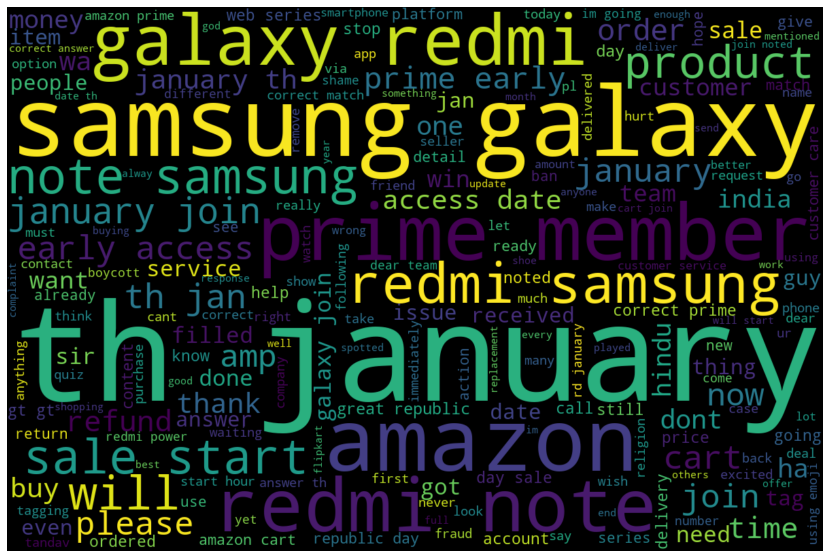

In [66]:
#WordCloud - Amazon

allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Amazon']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

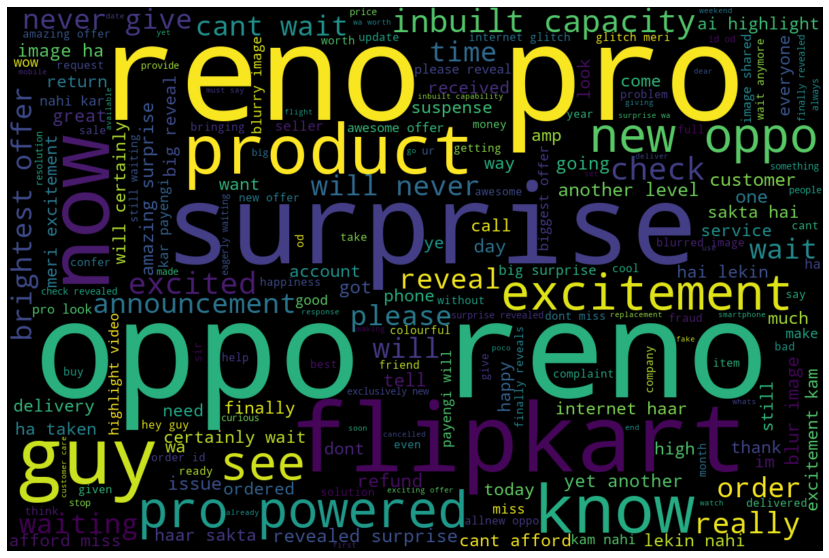

In [67]:
allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Flipkart']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

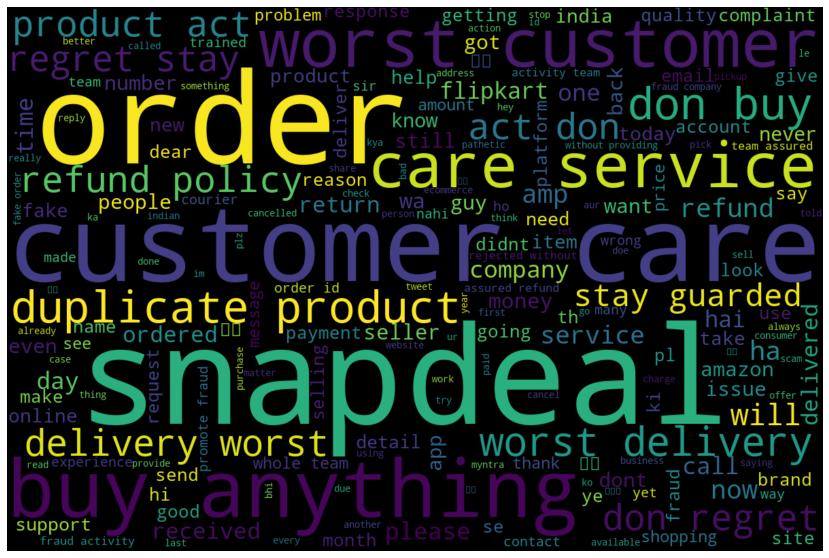

In [68]:
allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Snapdeal']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()